**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 7**
Análisis de Componentes Principales (PCA)

---

*   EQUIPO: 42
*   NOMBRE: Javier Alejandro Pérez Garza
*   MATRÍCULA: A01284386
*   NOMBRE: Marco Antonio Corona Ruiz
*   MATRÍCULA: A01370358
*   NOMBRE: Emiliano Saucedo Arriola
*   MATRÍCULA: A01659258
*   NOMBRE: César Miguel Barrientos Robles
*   MATRÍCULA: A01796615

In [484]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [485]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/TC4029 - Ciencia y analítica de datos/Semana 7/"
#DIR = "/content/drive/MyDrive/MNA/TC4029/Semana 7/"

os.chdir(DIR)

In [486]:
# !pip install pandas --quiet
# !pip install numpy --quiet
# !pip install matplotlib --quiet
# !pip install seaborn --quiet
# !pip install sklearn --quiet

In [487]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [488]:
cereals_df = pd.read_csv('Cereals.csv')
cereals_df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
74,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193


In [489]:
cereals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     76 non-null     float64
 9   sugars    76 non-null     float64
 10  potass    75 non-null     float64
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(7), int64(6), object(3)
memory usage: 9.8+ KB


# **Parte 1**. EDA y preprocesamiento

1. Obtén estadísticas descriptivas para todas las variables del dataframe.

In [490]:
cereals_df.describe().T

,count,mean,std,min,25%,50%,75%,max
calories,77.0,106.883117,19.484119,50.000000,100.000000,110.000000,110.000000,160.000000
protein,77.0,2.545455,1.094790,1.000000,2.000000,3.000000,3.000000,6.000000
fat,77.0,1.012987,1.006473,0.000000,0.000000,1.000000,2.000000,5.000000
sodium,77.0,159.675325,83.832295,0.000000,130.000000,180.000000,210.000000,320.000000
fiber,77.0,2.151948,2.383364,0.000000,1.000000,2.000000,3.000000,14.000000
carbo,76.0,14.802632,3.907326,5.000000,12.000000,14.500000,17.000000,23.000000
sugars,76.0,7.026316,4.378656,0.000000,3.000000,7.000000,11.000000,15.000000
potass,75.0,98.666667,70.410636,15.000000,42.500000,90.000000,120.000000,330.000000
vitamins,77.0,28.246753,22.342523,0.000000,25.000000,25.000000,25.000000,100.000000
shelf,77.0,2.207792,0.832524,1.000000,1.000000,2.000000,3.000000,3.000000


In [491]:
cereals_df.describe(include='object').T

,count,unique,top,freq
name,77,77,100%_Bran,1
mfr,77,7,K,23
type,77,2,C,74


Genera algunos gráficos para familiarizarte con el conjunto de datos. Al menos deberás incluir los que te permitan responder los siguientes cuestionamientos:

**Nota.** Debes responder de manera explícita las preguntas, apoyándote de los resultados observados de cada gráfico.

2a) ¿Cuál es la frecuencia o conteo de cada categoría para las variables: `mfr` y `shelf` (por separado)?

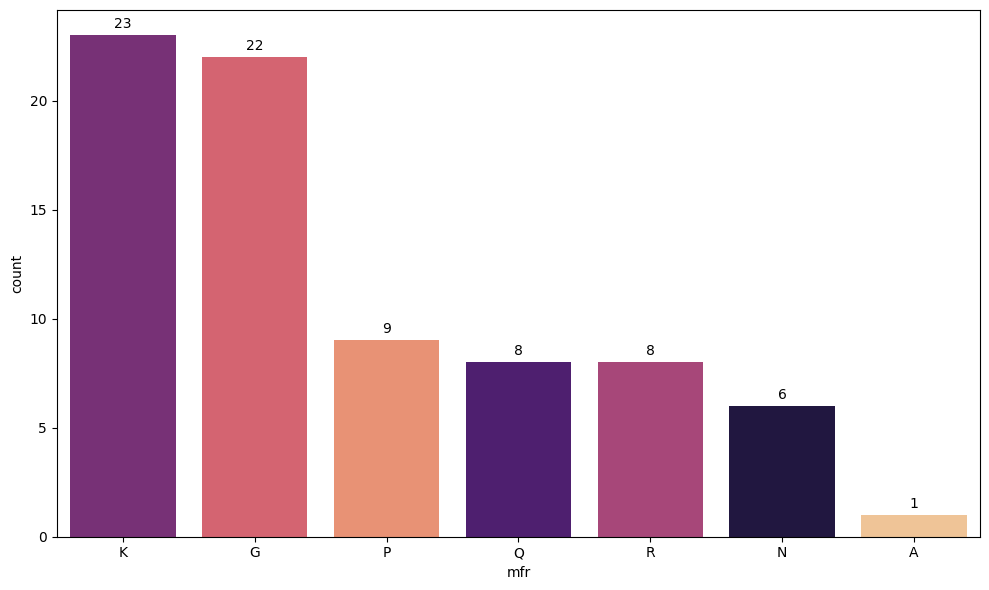

In [492]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=cereals_df, x='mfr', palette='magma', hue='mfr', order=cereals_df['mfr'].value_counts().index)
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, padding=3)

plt.tight_layout()
plt.show()

In [493]:
mfr_dict = {
    'A': 'American Home Food Products',
    'G': 'General Mills',
    'K': 'Kelloggs',
    'N': 'Nabisco',
    'P': 'Post',
    'Q': 'Quaker Oats',
    'R': 'Ralston Purina'
}

In [494]:
print("Conteo de productos por fabricante:")
cereals_df['mfr'].map(mfr_dict).value_counts()

Conteo de productos por fabricante:


,count
mfr,
Kelloggs,23
General Mills,22
Post,9
Quaker Oats,8
Ralston Purina,8
Nabisco,6
American Home Food Products,1


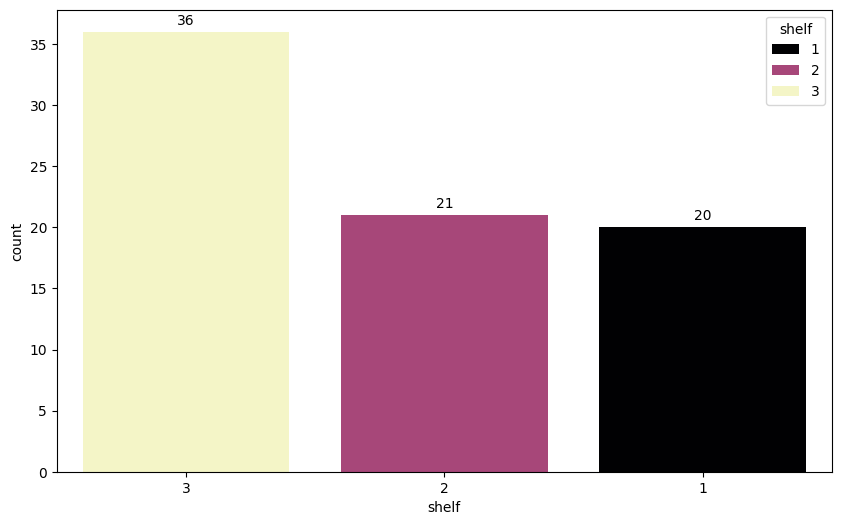

In [495]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=cereals_df, x='shelf', palette='magma', hue='shelf', order=cereals_df['shelf'].value_counts().index)
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, padding=3)
plt.show()

In [496]:
print("Conteo de productos en cada estante:")
cereals_df['shelf'].value_counts()

Conteo de productos en cada estante:


,count
shelf,
3,36
2,21
1,20


2b) Combina los resultados previos para observar, de cada fabricante, cuántos productos tiene en cada estante.

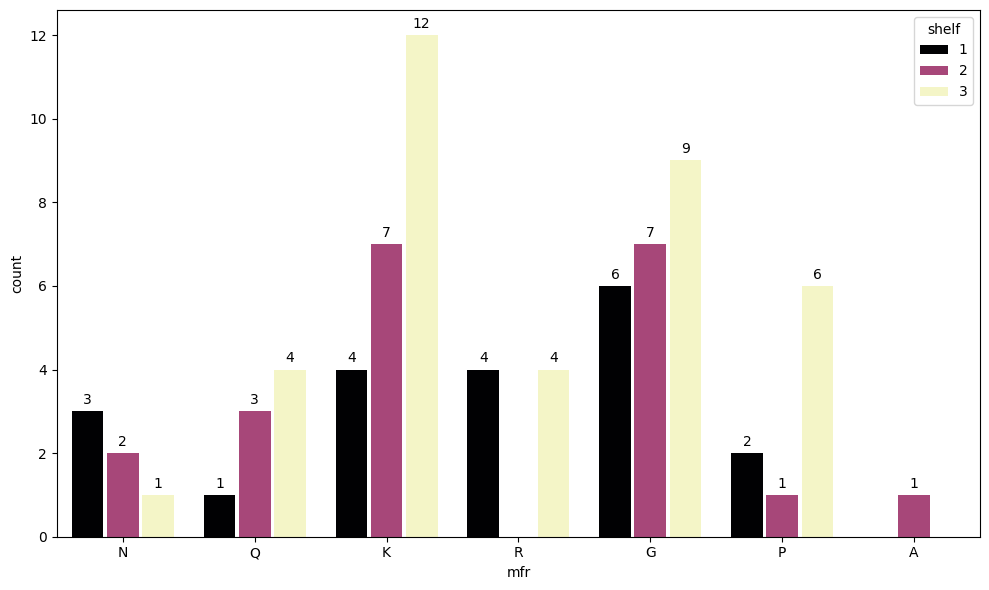

In [497]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=cereals_df, x='mfr', palette='magma', hue='shelf', gap=0.1)
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, padding=3)

plt.tight_layout()
plt.show()

**Frecuencia de productos por fabricante en cada estante**
- Existe una distribución desigual entre los productores.
- `Kellog's (K)` es el productor que tiene mayor presencia en los 3 estantes **(Frecuencia total 23)**, seguido de `General Mills (G)` **(Frecuencia total de 22)**.
- Existen productores con muy pocas observaciones, tales como `Nabisco (N)` **(Frecuencia total 6)** y `American Home Food Products (A)` **(Frecuencia total 61)**.
- La mayoría de los productos tienen presencia en los 3 estances, a excepción de `Ralston Purina (R)` y `American Home Food Products (A)`.

 3a) ¿Cuál es el rango más frecuente de la variable `rating`?

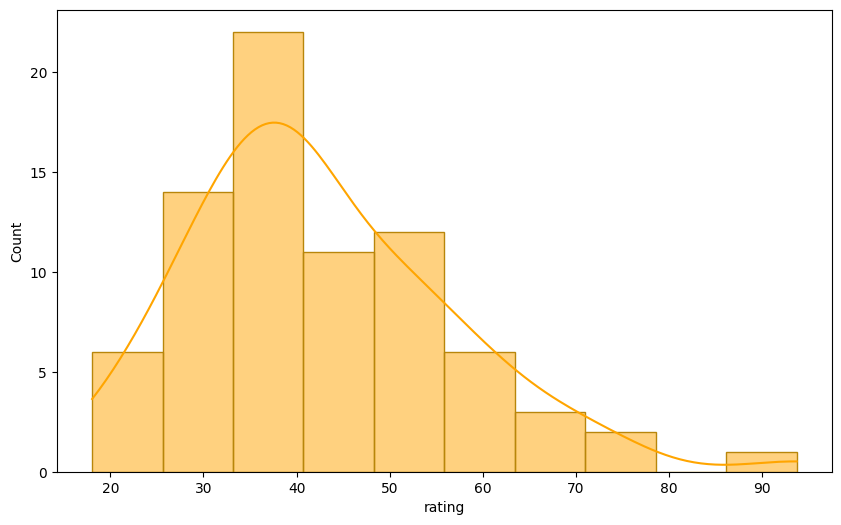

In [498]:
k = 10 #Numero de bins
plt.figure(figsize=(10, 6))
sns.histplot(data=cereals_df, x='rating', bins=k, kde=True, color='orange',  edgecolor='darkgoldenrod')
plt.show()

In [499]:
cereals_df['rating'].value_counts(bins=k)

,count
"(33.175, 40.741]",22
"(25.609, 33.175]",14
"(48.308, 55.874]",12
"(40.741, 48.308]",11
"(17.965999999999998, 25.609]",6
"(55.874, 63.44]",6
"(63.44, 71.006]",3
"(71.006, 78.572]",2
"(86.139, 93.705]",1
"(78.572, 86.139]",0


**Rangos de Rating**
Asignando 10 bins, el rango con mayor frecuencia es (33.175, 40.741] con un valor de 22. Este intervalo puede ser un indicador sobre la percepción general de los consumidores frente a los productos observados.

3b) ¿Cuáles son los 10 cereales mejor evaluados y a qué fabricante corresponden?

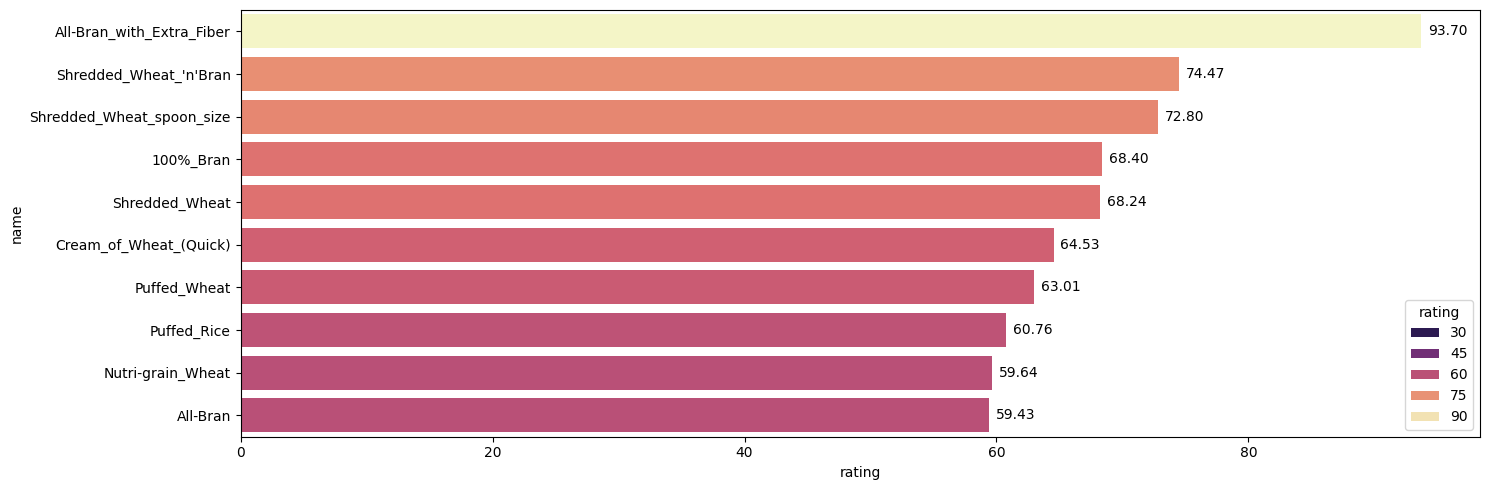

In [500]:
plt.figure(figsize=(15, 5))
top_cereals = cereals_df.sort_values('rating', ascending=False)['name'].head(10)
ax = sns.barplot(data=cereals_df, x='rating', y='name', palette='magma', hue='rating', order=top_cereals)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=5, label_type='edge')

plt.tight_layout()
plt.show()

In [501]:
df = cereals_df.sort_values('rating', ascending=False).head(10)
df[['mfr','name', 'rating']].reset_index(drop=True)

,mfr,name,rating
0,K,All-Bran_with_Extra_Fiber,93.704912
1,N,Shredded_Wheat_'n'Bran,74.472949
2,N,Shredded_Wheat_spoon_size,72.801787
3,N,100%_Bran,68.402973
4,N,Shredded_Wheat,68.235885
5,N,Cream_of_Wheat_(Quick),64.533816
6,Q,Puffed_Wheat,63.005645
7,Q,Puffed_Rice,60.756112
8,K,Nutri-grain_Wheat,59.642837
9,K,All-Bran,59.425505


**TOP 10 cereales mejor evaluados**
- El cereal mejor evaluado es All-Bran_with_Extra_Fiber (93.70), fabricado por Kellog's (K).
- La mayoría de los cereales mejor posicionados forman parte del fabricante Nabisco (N).

4a) Compara la distribución de las calorías según el fabricante, por medio de boxplots.

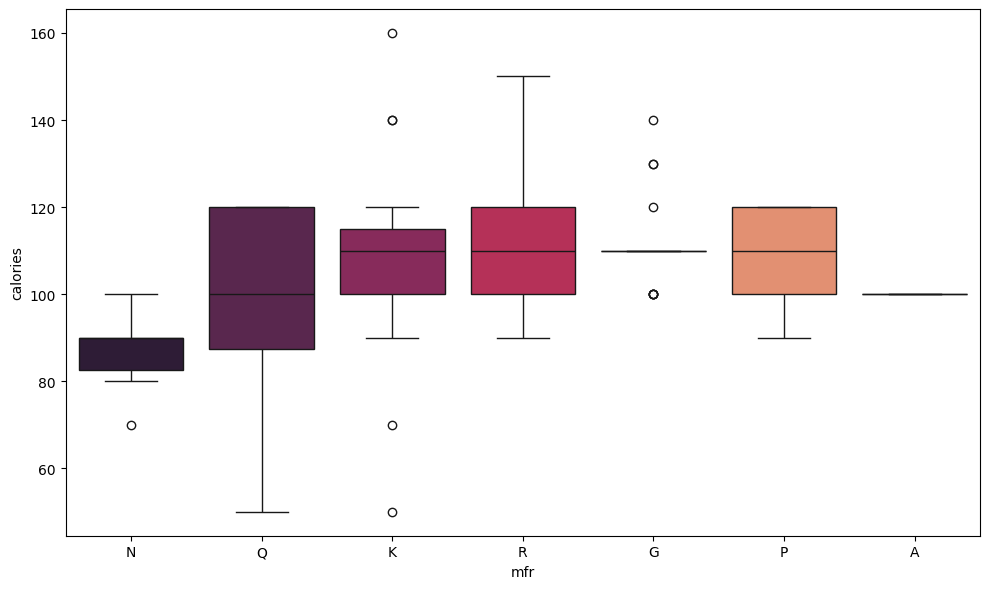

In [502]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=cereals_df, x='mfr', y='calories', palette='rocket', hue='mfr')
plt.tight_layout()
plt.show()

In [503]:
cereals_df.groupby('mfr')['calories'].describe()

,count,mean,std,min,25%,50%,75%,max
mfr,,,,,,,,
A,1.0,100.000000,NaN,100.0,100.0,100.0,100.0,100.0
G,22.0,111.363636,10.371873,100.0,110.0,110.0,110.0,140.0
K,23.0,108.695652,22.218818,50.0,100.0,110.0,115.0,160.0
N,6.0,86.666667,10.327956,70.0,82.5,90.0,90.0,100.0
P,9.0,108.888889,10.540926,90.0,100.0,110.0,120.0,120.0
Q,8.0,95.000000,29.277002,50.0,87.5,100.0,120.0,120.0
R,8.0,115.000000,22.677868,90.0,100.0,110.0,120.0,150.0


**Distribución de calorías por fabricante**
**Fabricante A**
- Presenta solo una observación. El cereal tiene 100 calorías.

**Fabricante G**
- Se puede apreciar que hay poca variabilidad. Los valores se concentran alrededor de 110. El rango va desde 100 hasta 140. Existen algunos valores atípicos.

**Fabricante K**
- Presenta un rango más amplio (50 a 160). Refleja una mayor variabilidad que se extiende hacia ambos lados.

**Fabricante N**
- Presenta el promedio más bajo (86.67), con un rango estrecho. Se puede visualizar la existencia de valores atípicos hacia abajo.

**Fabricante P**
- Presenta un rango limitado (90 a 120). La mayoría de las calorías se centran entre 100 y 120.

**Fabricante Q**
- Presenta la mayor dispersión en calorías. Tiene un rango amplio que va desde 50 hasta 120.

**Fabricante R**
- La mayoría de los cereales presentan calorías entre 100 a 120 calorías. Se puede apreciar un valor atípico de 150.

Observaciones generales.
- Casi todos los fabricantes presentan una mediana alrededor de 100 (A y Q) y 110 (G, K, P y R) a excepción de N (90).
- Se puede apreciar que G y R son fabricantes con mayor contenido calórico.
- El fabricante Q presenta una mayor dispersión, lo cual puede indicar una cartera de productos más amplia con diferente contenido energético.
- A pesar de que N es un fabricante con menos productos en comparación con la competencia, tiene los cereales con menos calorías.




4b) ¿Cuáles son las dos variables que tienen mayor correlación con `rating`?

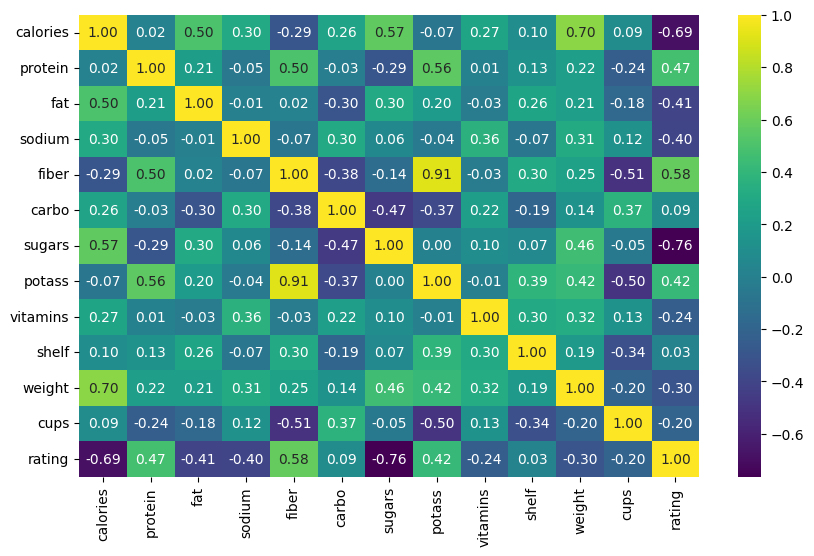

In [504]:
numeric_cols = cereals_df.select_dtypes(include='number').columns

plt.figure(figsize=(10, 6))
sns.heatmap(cereals_df[numeric_cols].corr(), annot=True, cmap='viridis', fmt='.2f')
plt.show()

**Correlación con Rating**

Las variables con **mayor correlación positiva** son:
- Fiber (0.58)
- Protein (0.47)

Las variables con **mayor correlación negativa** son:
- Calories (-0.69)
- Sugars (-0.76)

5. Elimina todos los registros con algún dato faltante y reinicia el índice del dataframe para que quede con valores consecutivos.

In [505]:
missing = cereals_df.isna().sum()
missing = missing[missing > 0]
missing

print(f"Las columnas con datos faltantes son:\n{missing}")

Las columnas con datos faltantes son:
carbo     1
sugars    1
potass    2
dtype: int64


In [506]:
cereals_df.dropna(inplace=True)
cereals_df.reset_index(drop=True, inplace=True)

In [507]:
cereals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      74 non-null     object 
 1   mfr       74 non-null     object 
 2   type      74 non-null     object 
 3   calories  74 non-null     int64  
 4   protein   74 non-null     int64  
 5   fat       74 non-null     int64  
 6   sodium    74 non-null     int64  
 7   fiber     74 non-null     float64
 8   carbo     74 non-null     float64
 9   sugars    74 non-null     float64
 10  potass    74 non-null     float64
 11  vitamins  74 non-null     int64  
 12  shelf     74 non-null     int64  
 13  weight    74 non-null     float64
 14  cups      74 non-null     float64
 15  rating    74 non-null     float64
dtypes: float64(7), int64(6), object(3)
memory usage: 9.4+ KB


In [508]:
missing = cereals_df.isna().sum()
missing

,0
name,0
mfr,0
type,0
calories,0
protein,0
fat,0
sodium,0
fiber,0
carbo,0
sugars,0


# **Parte 2**. Ingeniería de características

6. Considerando que `rating` es la variable de salida, almacénala en una variable `y` y separa los predictores **numéricos** en `X`. Escala los valores de `X` y aplica `PCA` para proyectar los datos en el nuevo espacio de vectores.

In [509]:
y = cereals_df['rating']
X = cereals_df.select_dtypes(include='number').drop(columns='rating')

In [510]:
total_components = X.shape[1]

In [511]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
0,-1.878652,1.391180,0.0,-0.393692,3.250706,-2.517206,-0.255940,2.578001,-0.183083,0.948401,-0.202203,-2.099895
1,0.658214,0.455295,4.0,-1.792572,-0.072986,-1.741067,0.206001,0.518288,-1.312098,0.948401,-0.202203,0.761919
2,-1.878652,1.391180,0.0,1.187651,2.835245,-1.999780,-0.486911,3.146198,-0.183083,0.948401,-0.202203,-2.099895
3,-2.893399,1.391180,-1.0,-0.272050,4.912553,-1.741067,-1.641763,3.288247,-0.183083,0.948401,-0.202203,-1.373763
4,0.150841,-0.480589,1.0,0.214517,-0.280717,-1.094285,0.667942,-0.405032,-0.183083,-1.471657,-0.202203,-0.305922
...,...,...,...,...,...,...,...,...,...,...,...,...
69,0.150841,-0.480589,0.0,1.066009,-0.903910,1.622199,-0.948852,-0.547081,-0.183083,0.948401,-0.202203,-0.305922
70,0.150841,-1.416474,0.0,-0.272050,-0.903910,-0.447503,1.129883,-1.044254,-0.183083,-0.261628,-0.202203,0.761919
71,-0.356533,0.455295,0.0,0.822725,0.342475,0.587348,-0.948852,0.234189,-0.183083,-1.471657,-0.202203,-0.647631
72,-0.356533,0.455295,0.0,0.457800,0.342475,0.587348,-0.948852,0.163165,-0.183083,-1.471657,-0.202203,0.761919


In [512]:
from sklearn.decomposition import PCA
pca = PCA()
X_projected = pca.fit_transform(X_scaled)
X_projected = pd.DataFrame(X_projected, columns=[f'PC{i+1}' for i in range(X_projected.shape[1])])
X_projected.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,4.870399,-2.934238,-0.055266,0.244647,-1.102035,0.904575,0.235388,-0.247787,-0.124799,-0.046331,-0.238706,0.021342
1,1.761110,0.210993,-3.014058,-0.494129,3.275506,1.065041,-0.489640,0.895201,-0.835394,0.595071,-0.069954,-0.089523
2,4.727161,-2.402254,0.869028,-0.095823,-1.357388,1.393861,1.210340,0.182089,0.139267,-0.090776,0.488302,-0.035570
3,5.142814,-4.401826,1.883153,0.209854,-1.662387,0.955808,-0.289695,0.865569,-0.682678,-0.099300,-0.708471,0.108198
4,-0.332394,0.284619,-1.490929,-0.944313,-0.311262,0.828872,0.493652,-0.808361,-0.712896,0.100511,-0.093129,-0.076342


7. Obtén la curva del porcentaje de varianza acumulada y determine el número mínimo de componentes principales que explique más del 90% de la varianza. Imprime la información de dichos componentes.

In [513]:
for i in range(0, total_components):
    print(f"La varianza explicada por el componente principal {i + 1} es: {np.round(pca.explained_variance_ratio_[i].sum()*100, decimals=2)}%")

La varianza explicada por el componente principal 1 es: 27.66%
La varianza explicada por el componente principal 2 es: 22.06%
La varianza explicada por el componente principal 3 es: 14.88%
La varianza explicada por el componente principal 4 es: 8.48%
La varianza explicada por el componente principal 5 es: 8.2%
La varianza explicada por el componente principal 6 es: 5.75%
La varianza explicada por el componente principal 7 es: 5.5%
La varianza explicada por el componente principal 8 es: 3.47%
La varianza explicada por el componente principal 9 es: 2.61%
La varianza explicada por el componente principal 10 es: 0.76%
La varianza explicada por el componente principal 11 es: 0.47%
La varianza explicada por el componente principal 12 es: 0.15%


In [514]:
varianza_explicada = pca.explained_variance_ratio_
varianza_explicada

array([0.2766149 , 0.22059749, 0.1488355 , 0.08479752, 0.08202324,
       0.05748156, 0.05498713, 0.03467223, 0.02614423, 0.00764976,
       0.0046911 , 0.00150535])

In [515]:
varianza_acumulada = np.cumsum(pca.explained_variance_ratio_)
varianza_acumulada

array([0.2766149 , 0.49721239, 0.64604788, 0.7308454 , 0.81286864,
       0.87035019, 0.92533733, 0.96000956, 0.98615378, 0.99380355,
       0.99849465, 1.        ])

In [516]:
componente_df = pd.DataFrame({
    "Componente": range(1, len(varianza_acumulada) + 1),
    "Varianza Explicada": varianza_explicada,
    "Varianza Acumulada": varianza_acumulada
})
componente_df

,Componente,Varianza Explicada,Varianza Acumulada
0,1,0.276615,0.276615
1,2,0.220597,0.497212
2,3,0.148835,0.646048
3,4,0.084798,0.730845
4,5,0.082023,0.812869
5,6,0.057482,0.870350
6,7,0.054987,0.925337
7,8,0.034672,0.960010
8,9,0.026144,0.986154
9,10,0.007650,0.993804


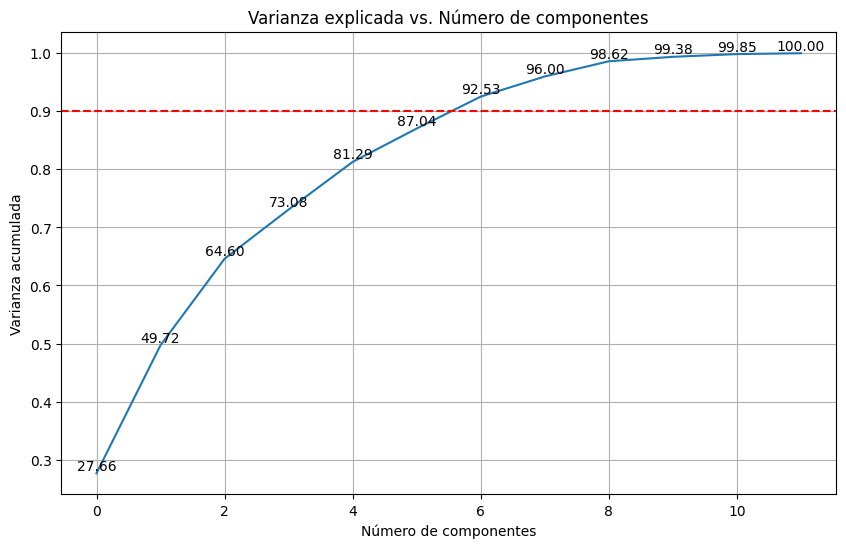

In [517]:
plt.figure(figsize=(10, 6))
plt.plot(varianza_acumulada)
plt.xlabel('Número de componentes')
plt.ylabel('Varianza acumulada')
plt.title('Varianza explicada vs. Número de componentes')
plt.grid()
plt.axhline(y=0.90, color='r', linestyle='--')
labels = varianza_acumulada * 100

for i in range(total_components):
    plt.text(i, varianza_acumulada[i], f'{labels[i]:.2f}', ha='center', va='bottom')

plt.show()

In [518]:
n_components = np.argmax(varianza_acumulada >= 0.90) + 1
print(f"Se necesitan {n_components} componentes para explicar más del 90% de la varianza")

Se necesitan 7 componentes para explicar más del 90% de la varianza


8. ¿Cuáles son las tres variables más importantes en el cálculo del primer componente?


Variable más importante 1: potass, con una carga de 0.5026030543435396
Variable más importante 2: fiber, con una carga de 0.4586233006912047
Variable más importante 3: cups, con una carga de 0.37115375801482114


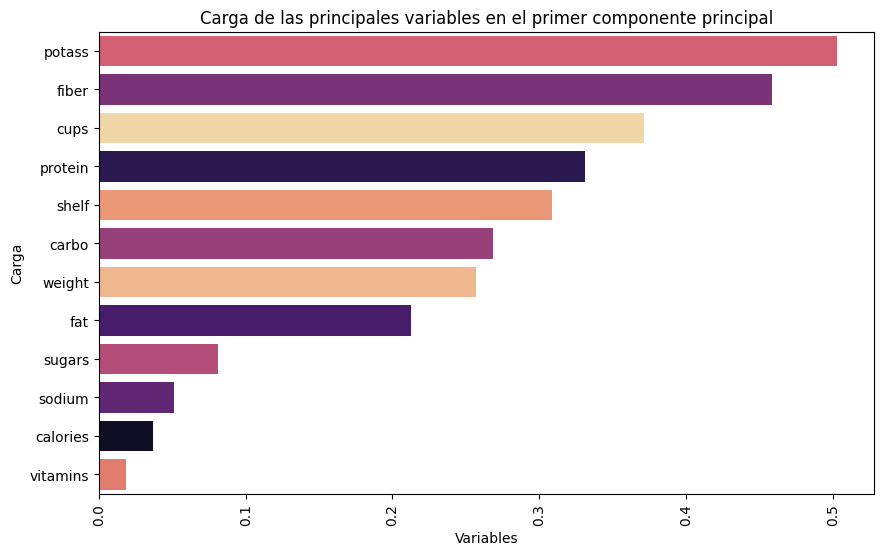

In [519]:
primer_componente = np.abs(pca.components_[0])
indices_ordenados = np.argsort(primer_componente)[::-1]

valores = []
columnas = []

for i in range(3):
  print(f"Variable más importante {i + 1}: {X.columns[indices_ordenados[i]]}, con una carga de {primer_componente[indices_ordenados[i]]}")
  columnas.append(X.columns[indices_ordenados[i]])
  valores.append(primer_componente[indices_ordenados[i]])

plt.figure(figsize=(10, 6))
sns.barplot(x=primer_componente, y=X.columns, palette='magma', hue=X.columns, orient='h', order=X.columns[indices_ordenados])
plt.xlabel('Variables')
plt.ylabel('Carga')
plt.title('Carga de las principales variables en el primer componente principal')
plt.xticks(rotation=90)
plt.show()

9. ¿Todas las variables categóricas son predictores? Aplica una técnica de encoding a las que sí lo sean. Justifica la elección de tu técnica.

In [520]:
cereals_df.describe(include='object').T

,count,unique,top,freq
name,74,74,100%_Bran,1
mfr,74,7,K,23
type,74,2,C,73


**Variables categóricas como predictores**
- La variable `name` no puede ser considerada como predictor, ya que cada cereal presenta un valor único.
- La variable `type`presenta 2 categorías (H y C); sin embargo, no sería un buen predictor ya que de los 74 registros, 73 pertenecen a la misma categoría (C).
- La variable `mfr` sí puede ser considerado como predictor ya que tiene una variabilidad de 7 valores únicos agrupando los productos en categorías más amplias (7 fabricantes), lo que hace más probable que haya una relación significativa entre el fabricante y la variable que estás tratando de predecir.

Mfr tiene un peso importante ya que de acuerdo a la información los clientes
prefieren comprar productos de Kellogs que de los demás fabricantes.

La técnica de Encoding que se usará es One-Hot Encoding porque convierte las categorías en columnas binarias (0 o 1) sin asumir un orden entre ellas, lo que es ideal para variables sin jerarquía. Además, facilita el uso de estas variables en algoritmos de machine learning que requieren valores numéricos.

In [521]:
from sklearn.preprocessing import OneHotEncoder
predictor_cols = ['mfr']
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(cereals_df[predictor_cols])
onehot_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(predictor_cols))
onehot_df

,mfr_A,mfr_G,mfr_K,mfr_N,mfr_P,mfr_Q,mfr_R
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
69,0.0,1.0,0.0,0.0,0.0,0.0,0.0
70,0.0,1.0,0.0,0.0,0.0,0.0,0.0
71,0.0,0.0,0.0,0.0,0.0,0.0,1.0
72,0.0,1.0,0.0,0.0,0.0,0.0,0.0


10. Conjunta, en un dataframe, las valores proyectados en los componentes seleccionados (mínimo), las transformaciones obtenidas de las variables categóricas que serán predictores y la variable de salida. Almacena el dataframe resultante en archivo.

In [522]:
new_data = X_projected.iloc[:,0:n_components]
new_data.columns = ['PC{}'.format(i) for i in range(1, n_components + 1)]
new_data = pd.concat([new_data, onehot_df], axis=1)
new_data = pd.concat([new_data,y], axis=1)
new_data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,mfr_A,mfr_G,mfr_K,mfr_N,mfr_P,mfr_Q,mfr_R,rating
0,4.870399,-2.934238,-0.055266,0.244647,-1.102035,0.904575,0.235388,0.0,0.0,0.0,1.0,0.0,0.0,0.0,68.402973
1,1.761110,0.210993,-3.014058,-0.494129,3.275506,1.065041,-0.489640,0.0,0.0,0.0,0.0,0.0,1.0,0.0,33.983679
2,4.727161,-2.402254,0.869028,-0.095823,-1.357388,1.393861,1.210340,0.0,0.0,1.0,0.0,0.0,0.0,0.0,59.425505
3,5.142814,-4.401826,1.883153,0.209854,-1.662387,0.955808,-0.289695,0.0,0.0,1.0,0.0,0.0,0.0,0.0,93.704912
4,-0.332394,0.284619,-1.490929,-0.944313,-0.311262,0.828872,0.493652,0.0,1.0,0.0,0.0,0.0,0.0,0.0,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,-1.059199,0.475067,1.161330,0.495373,0.749484,-0.773891,1.520184,0.0,1.0,0.0,0.0,0.0,0.0,0.0,39.106174
70,-1.595568,0.574653,-1.671901,0.380863,-0.489233,0.116453,-0.204196,0.0,1.0,0.0,0.0,0.0,0.0,0.0,27.753301
71,-0.134252,-0.612590,1.181098,-1.357046,-0.190222,0.163728,0.799693,0.0,0.0,0.0,0.0,0.0,0.0,1.0,49.787445
72,-0.674537,-0.568589,1.163186,-1.330649,0.088594,0.644712,-0.247744,0.0,1.0,0.0,0.0,0.0,0.0,0.0,51.592193


In [523]:
new_data.to_csv('cereals_pca.csv')